# Support Vector Machines (SVM)

This notebook demonstrates the main concepts of SVM using the `scikit-learn` library. We will explore:
- The concept of hyperplanes, margins, and support vectors.
- How different kernels affect decision boundaries.

We will use the `make_moons` dataset, a non-linear dataset, to highlight the effects of various kernels.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

## Step 1: Create a Non-linear Dataset

We will use the `make_moons` dataset, which is a simple, two-class, non-linear dataset.

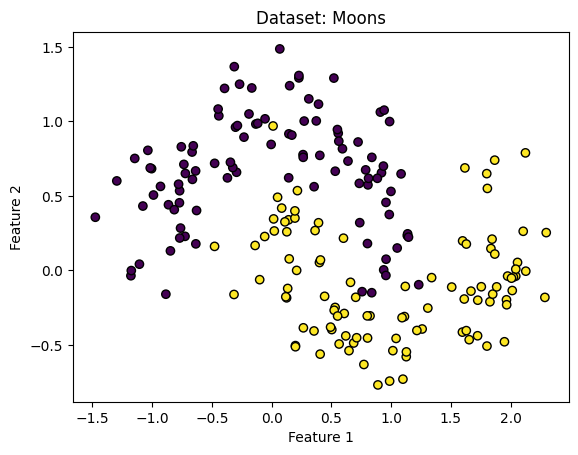

In [2]:
# Generate the dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Dataset: Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Step 2: Define a Helper Function to Visualize Decision Boundaries

This function will plot the decision boundary of an SVM for different kernels.

In [3]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

## Step 3: Train and Visualize SVM with Different Kernels

We will train SVM models using the following kernels:
- **Linear Kernel**
- **Polynomial Kernel**
- **RBF (Radial Basis Function) Kernel**
- **Sigmoid Kernel**

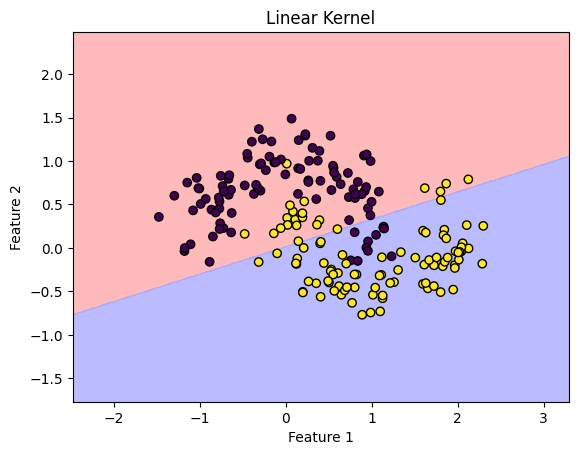

Linear Kernel Accuracy: 0.8333333333333334


In [4]:
# Linear Kernel
linear_clf = SVC(kernel='linear')
linear_clf.fit(X_train, y_train)
plot_decision_boundary(linear_clf, X, y, 'Linear Kernel')

# Evaluate
y_pred = linear_clf.predict(X_test)
print('Linear Kernel Accuracy:', accuracy_score(y_test, y_pred))

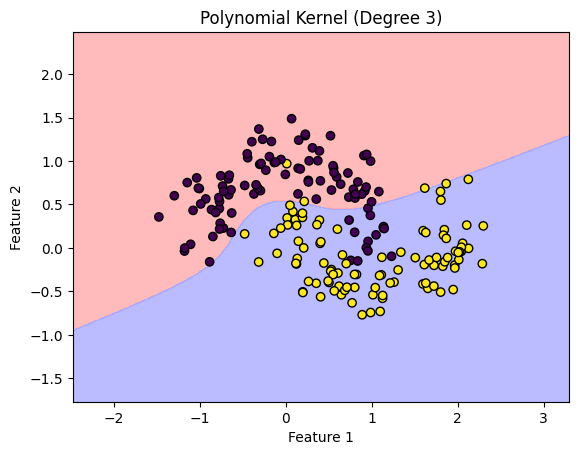

Polynomial Kernel Accuracy: 0.95


In [5]:
# Polynomial Kernel
poly_clf = SVC(kernel='poly', degree=3)
poly_clf.fit(X_train, y_train)
plot_decision_boundary(poly_clf, X, y, 'Polynomial Kernel (Degree 3)')

# Evaluate
y_pred = poly_clf.predict(X_test)
print('Polynomial Kernel Accuracy:', accuracy_score(y_test, y_pred))

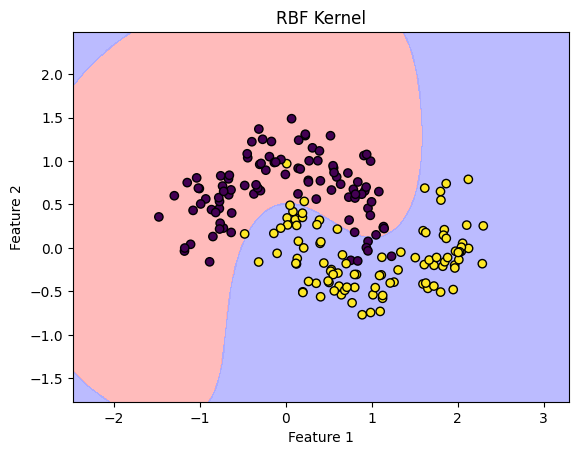

RBF Kernel Accuracy: 0.9666666666666667


In [6]:
# RBF Kernel
rbf_clf = SVC(kernel='rbf', gamma=0.7)
rbf_clf.fit(X_train, y_train)
plot_decision_boundary(rbf_clf, X, y, 'RBF Kernel')

# Evaluate
y_pred = rbf_clf.predict(X_test)
print('RBF Kernel Accuracy:', accuracy_score(y_test, y_pred))

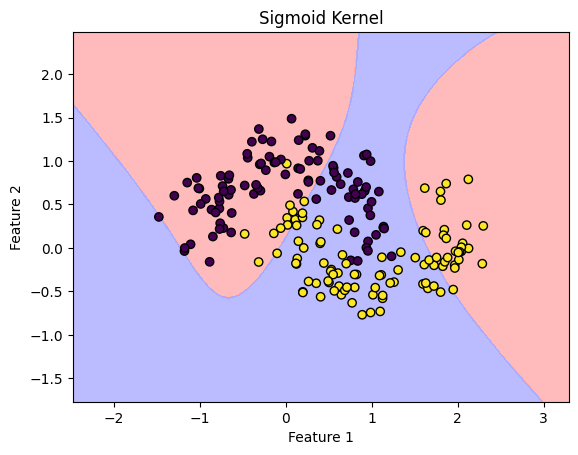

Sigmoid Kernel Accuracy: 0.6333333333333333


In [7]:
# Sigmoid Kernel
sigmoid_clf = SVC(kernel='sigmoid')
sigmoid_clf.fit(X_train, y_train)
plot_decision_boundary(sigmoid_clf, X, y, 'Sigmoid Kernel')

# Evaluate
y_pred = sigmoid_clf.predict(X_test)
print('Sigmoid Kernel Accuracy:', accuracy_score(y_test, y_pred))